### 분류용 선형 모델

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display
import numpy as np
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline

path="c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown')
plt.rcParams['axes.unicode_minus']=False

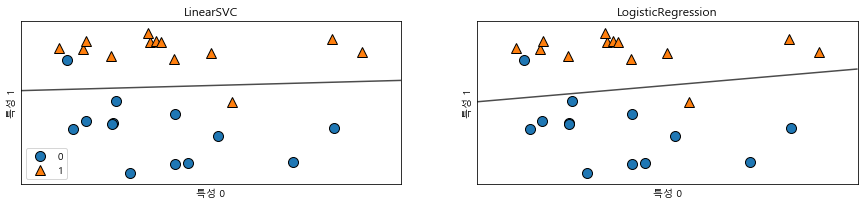

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(15,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

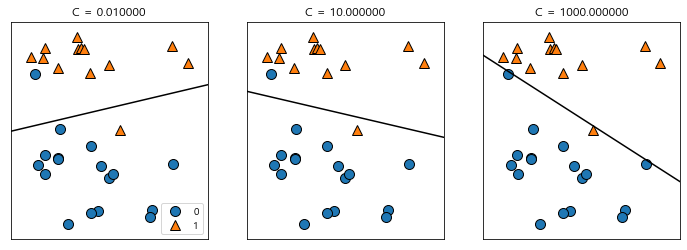

In [7]:
mglearn.plots.plot_linear_svc_regularization()

C값이 작을수록 규제가 많이 적용된다. 오른쪽 그림은 모든 데이터 포인트를 정확하게 분류하려고 했지만, 과대적합된 것으로 보인다.

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(x_train, y_train)
print("train set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("test set score: {:.3f}".format(logreg.score(x_test, y_test)))

train set score: 0.955
test set score: 0.958


c=1일때 train과 test에서 모두 좋은 성능을 내고 있지만 비슷한 성능을 내고 있으므로 과소적합으로 보인다.

In [11]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("train set score: {:.3f}".format(logreg100.score(x_train, y_train)))
print("test set score: {:.3f}".format(logreg100.score(x_test, y_test)))

train set score: 0.972
test set score: 0.965


In [12]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("train set score: {:.3f}".format(logreg001.score(x_train, y_train)))
print("test set score: {:.3f}".format(logreg001.score(x_test, y_test)))

train set score: 0.934
test set score: 0.930


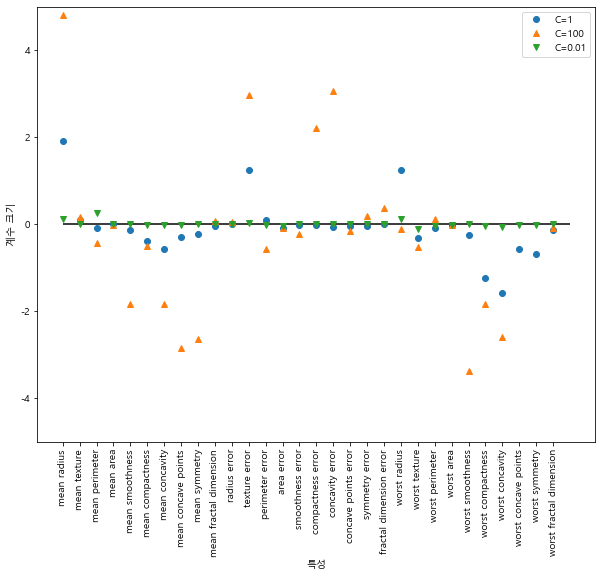

In [15]:
plt.figure(figsize=(10,8))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend();

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


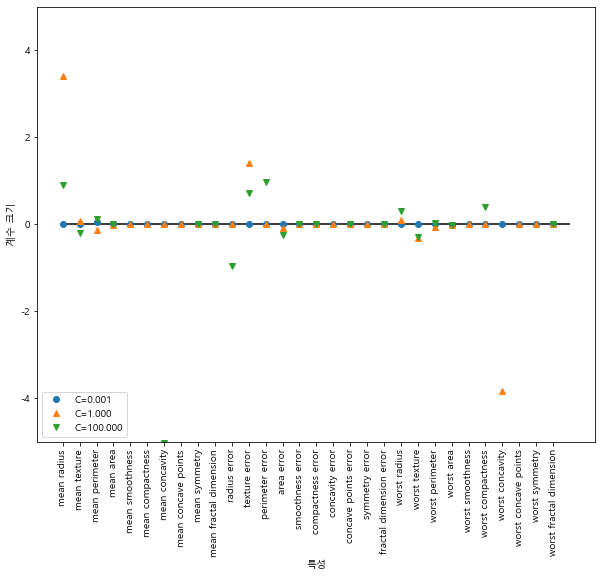

In [19]:
plt.figure(figsize=(10,8))
for C, marker in zip([0.001, 1, 100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(x_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(x_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3);

### 다중 클래스 분류용 선형 모델

In [20]:
X, y = make_blobs(random_state=42)

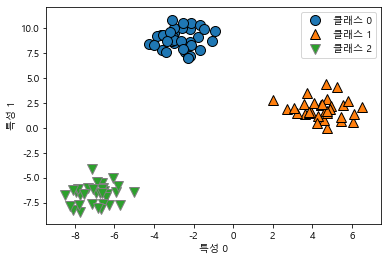

In [22]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"]);

In [23]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


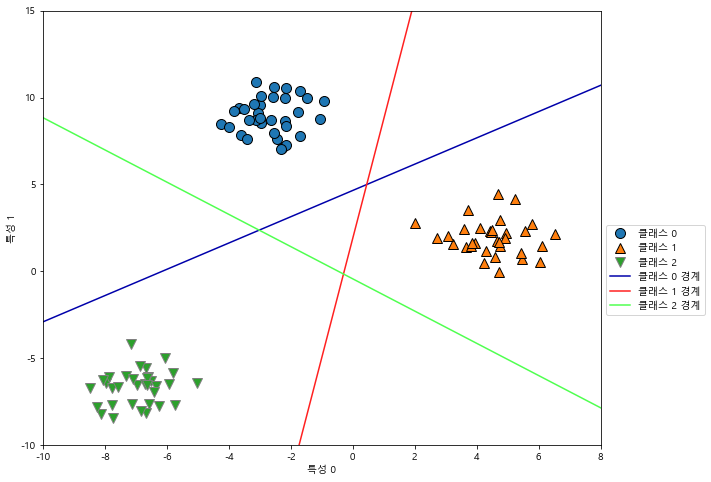

In [26]:
plt.figure(figsize=(10,8))
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계' ], loc=(1.01, 0.3));

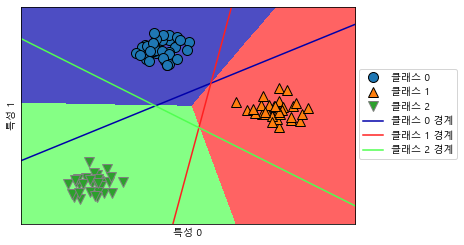

In [27]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1] , c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계' ], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1");

그림 중앙의 면적에 해당하는 데이터 포인트는 가장 가까운 직선의 클래스로 분류될 것이다.

> 정리
* 선형 모델에서의 매개변수는 alpha
* LinearSVC와 LogisticRegression에서는 C
* alpha는 클수록, C는 작을수록 모델이 단순해진다. 이 매개변수를 조정하는 일이 매우 중요함.
* L1, L2 규제 중 무엇을 사용할지 결정해야하는데, 중요한 특성이 많지 않다고 생각하면 L1, 그렇지 않으면 기본적으로 L2를 사용한다.
* L1 규제는 모델의 해석이 중요할때 사용할 수 있다. 몇 가지 특성만 사용하므로 설명하기에 용이.

> 메서드 연결
```
logreg = LogisticRegression().fit(x_train, y_train)
y_pred = logreg.fit(x_train, y_train).predict(x_test)
y_pred = LogisticRegression().fit(x_train, y_train).predict(x_test)
```
3번째 줄처럼 쓰는 것은 한 줄에 너무 많은 메서드가 들어가서 복잡하고, 모델 자체가 저장되지 않아서 바람직하지 않다.